# 4.10 Coding Etiquette & Excel Reporting Part 2

## Importing Libraries

### This script contains the following points

#### Importing pkl file


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Large Files'

In [5]:
path

'C:\\Large Files'

In [6]:
#Import orders_products_customers_merged.pkl from Prepared Data folder
ords_prods_cust = pd.read_pickle(os.path.join(path, 'orders_products_customers_merged.pkl'))

In [7]:
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,Date_joined,Num_deps,Marital_status,income,_merge,Region,low_activity,Age_flag,income_flag,Num_deps_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants


In [8]:
ords_prods_cust.columns

Index([                    'product_id',                   'product_name',
                             'aisle_id',                  'department_id',
                               'prices',                       'order_id',
                              'user_id',                   'order_number',
                   'orders_day_of_week',             'orders_time_of_day',
               'days_since_prior_order',              'add_to_cart_order',
                            'reordered',                'price_range_loc',
                         'busiest_days',                   'slowest_days',
       ('busiest_days', 'slowest_days'),          'busiest_period_of_day',
                            'max_order',                   'loyalty_flag',
                        'average_spend',                   'spender_flag',
                   'customer_frequency',                 'frequency_flag',
                               'Gender',                          'State',
                         

In [9]:
ords_prods_cust.head(20).to_csv('temp.csv')

In [11]:
#using the loc process for price range groupings, high range first....
ords_prods_cust.loc[ords_prods_cust['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [12]:
#next the#mid-range
ords_prods_cust.loc[(ords_prods_cust['prices'] <= 15) & (ords_prods_cust['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [13]:
#finding the low range on the ords_prods_cust set
ords_prods_cust.loc[ords_prods_cust['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [14]:
ords_prods_cust['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

In [15]:
path2 = r'C:\Users\melan\OneDrive\Career Foundry\04 2024 Instacart Basket Analysis'

In [16]:
path2

'C:\\Users\\melan\\OneDrive\\Career Foundry\\04 2024 Instacart Basket Analysis'

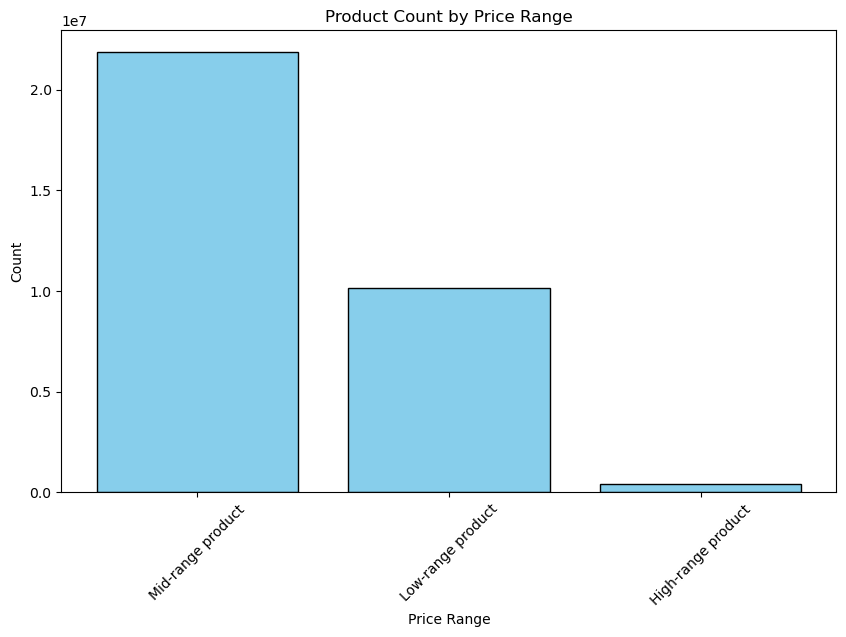

In [17]:
# Step 1: Create the data
data = {'price_range_loc': ['Mid-range product', 'Low-range product', 'High-range product'],
        'count': [21860860, 10126321, 417678]}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Step 2: Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['price_range_loc'], df['count'], color='skyblue', edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Product Count by Price Range')

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'price_range_loc.png'), bbox_inches = 'tight')
plt.show()


In [18]:
#Importing departments dataframe
df_dept = pd.read_csv(os.path.join(path2, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [19]:
#checking departments dataframe
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
#Renaming unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [21]:
df_dept.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
#Merging dept df with df_active on department_id
#checking dataframe
df_active_dep = ords_prods_cust.merge(df_dept, on = 'department_id', indicator = 'merge1')

In [23]:
df_active_dep.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,Marital_status,income,_merge,Region,low_activity,Age_flag,income_flag,Num_deps_flag,department,merge1
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,Midwest,False,Senior,Low Income,With Dependants,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,Midwest,False,Senior,Low Income,With Dependants,snacks,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,married,49620,both,Midwest,False,Senior,Low Income,With Dependants,meat seafood,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,married,49620,both,Midwest,False,Senior,Low Income,With Dependants,meat seafood,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,married,49620,both,Midwest,False,Senior,Low Income,With Dependants,bulk,both


In [24]:
#check the value counts of the departments
df_active_dep['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

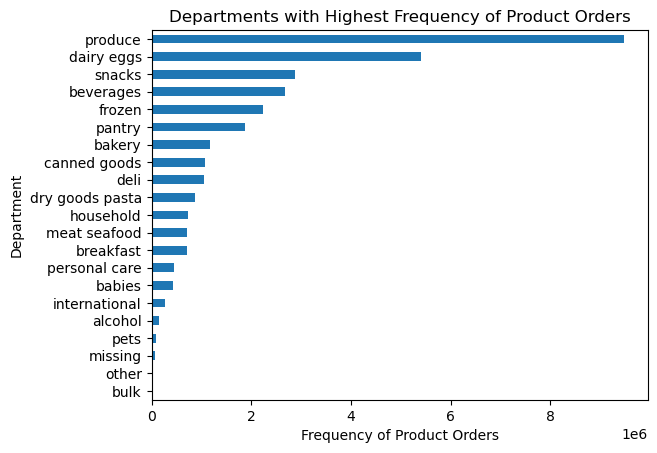

In [25]:
Bar = df_active_dep.department.value_counts().sort_values().plot(kind = 'barh')
plt.xlabel('Frequency of Product Orders')
plt.ylabel('Department')
plt.title('Departments with Highest Frequency of Product Orders')
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'dept_frequency_orders.png'), bbox_inches = 'tight')

In [26]:
# Filter data to include only the produce department
produce_products = df_active_dep[df_active_dep['department'] == 'produce']['product_name'].tolist()

In [27]:
produce_products

['Mini Seedless Watermelon Pack',
 'Clementines',
 'Classic Baby Creamers Potatoes',
 'Packaged Grape Tomatoes',
 'Packaged Grape Tomatoes',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Hass Avocados',
 'Rainbow Bell Peppers',
 'Rainbow Bell Peppers',
 'Organic Baby Spinach',
 'Bunny-Luv Organic Carrots',
 'Gourmet Tomato Medley',
 'Romaine Hearts',
 'Organic Crimini Mushrooms',
 'Organic Crimini Mushrooms',
 'Organic Crimini Mushrooms',
 'Organic Crimini Mushrooms',
 'Organic Crimini Mushrooms',
 'Organic Spring Mix',
 'Bag of Jumbo Yellow Onions',
 'Grapes',
 'Watermelon Chunks',
 'White Onion',
 'Lettuce Romaine Hearts',
 'Fresh Cut Cauliflower & Broccoli Steam in Bag',
 'Strawberries',
 'Strawberries',
 'Mini Sweet Peppers',
 'Apple, Juicy Red, Family Pack',
 'Red Onion',
 'Bag of Oranges',
 'Bag of Red Delicious Apples',
 'Bag of Red Delicious Apples',
 'Broccoli Florettes',
 'Broc

In [28]:
# Filter data to include only the dairy eggs department
dairy_eggs_products = df_active_dep[df_active_dep['department'] == 'dairy eggs']['product_name'].tolist()

In [29]:
dairy_eggs_products

['Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Half And Half Cream',
 'Fresh Mozzarella All-Natural Sliced Cheese',
 'Original Almondmilk',
 'Original Almondmilk',
 'Original Almondmilk',
 'Dairy Free Unsweetened Coconut Milk',
 'Reduced Fat 2% Milk',
 'Organic Unsweetened Almond Milk',
 'Unsalted Butter Quarters',
 'Unsalted Butter Quarters',
 'Unsalted Butter Quarters',
 'Unsalted Butter Quarters',
 'Unsalted Butter Quarters',
 'Mozzarella String Cheese',
 'Reduced Fat Colby-Jack Cheese Sticks',
 'Greek 100 Protein Vanilla Fat Free Yogurt',
 'Greek 100 Protein Vanilla Fat Free Yogurt',
 'Greek 100 Protein Vanilla Fat Free Yogurt',
 'Pepper Jack Cheese

In [30]:
# Filter data to include only the snacks department
snacks_products = df_active_dep[df_active_dep['department'] == 'snacks']['product_name'].tolist()

In [31]:
snacks_products

['Chocolate Sandwich Cookies',
 'Chocolate Sandwich Cookies',
 'Table Water Crackers',
 'Organic Simply Naked Pita Chips',
 'Almonds',
 'Tortilla Chips',
 'Tortilla Chips',
 'Brownie Bites',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Sea Salt Brown Rice Crackers',
 'Nacho Cheese Flavored Tortilla Chips',
 'Nacho Cheese Flavored Tortilla Chips',
 'Nacho Cheese Flavored Tortilla Chips',
 'Nacho Cheese Flavored Tortilla Chips',
 'Full Size Milk Chocolate Bar With Almonds',
 'Graham Crackers',
 'Graham Crackers',
 'MultiGrain & Seed Chips, Superfood, Sweet Potato, Hemp & Buckwheat',
 'Dried Tart Cherries',
 'Dried Tart Cherries',
 'Dried Tart Cherries',
 'Dried Tart Cherries',
 'Organic Tortilla Chips',
 'Chocolate Chip Cookies',
 'Chocolate Chip Cookies',
 'Chocolate Ch

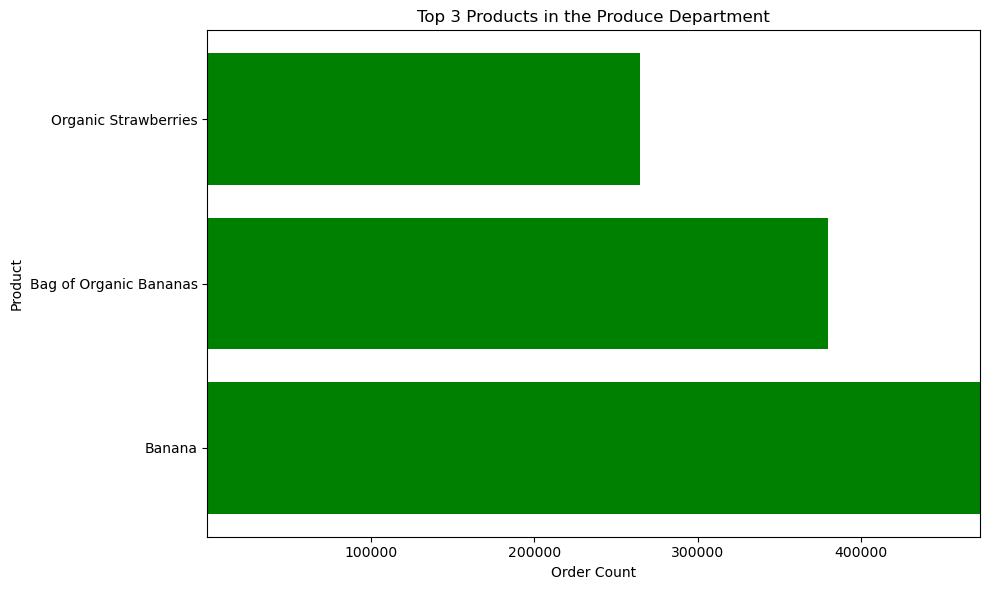

In [32]:
# Filter the DataFrame for the produce department
produce_products = df_active_dep[df_active_dep['department'] == 'produce']

# Compute the order counts for each product
order_counts = produce_products['product_name'].value_counts().reset_index()
order_counts.columns = ['product_name', 'order_count']

# Find the top 3 products in the produce department based on order count
top_produce_products = order_counts.nlargest(3, 'order_count')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(top_produce_products['product_name'], top_produce_products['order_count'], color='green')
plt.xlabel('Order Count')
plt.ylabel('Product')
plt.title('Top 3 Products in the Produce Department')
plt.xlim(1, top_produce_products['order_count'].max() + 1)  # Add some padding to the max count

# Ensure the layout is tight so labels are not cut off
plt.tight_layout()

plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'Top_3_produce.png'), bbox_inches = 'tight')

# Show the plot
plt.show()


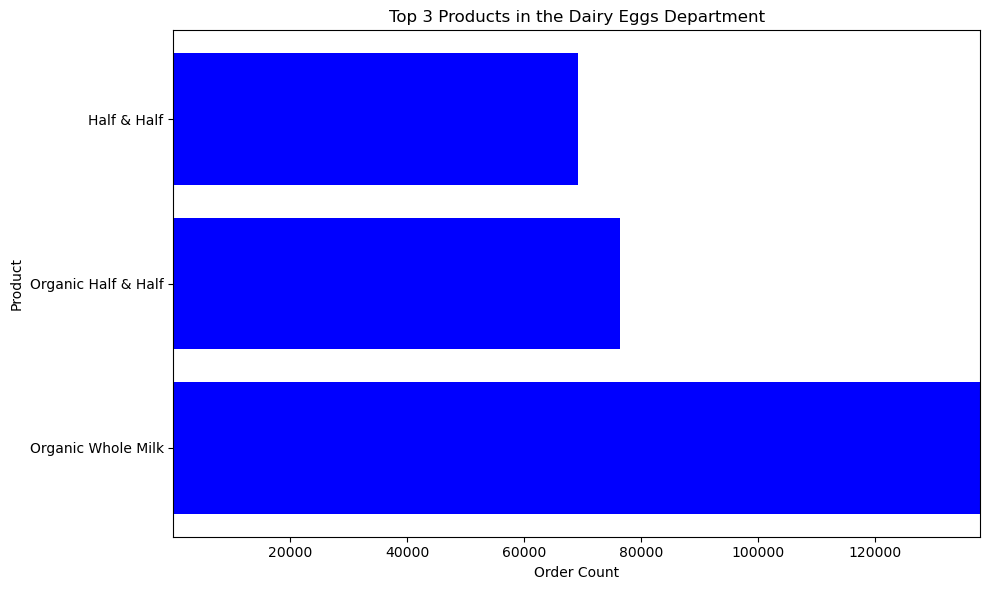

In [33]:
# Filter the DataFrame for the dairy eggs department
dairy_eggs_products = df_active_dep[df_active_dep['department'] == 'dairy eggs']

# Compute the order counts for each product
order_counts = dairy_eggs_products['product_name'].value_counts().reset_index()
order_counts.columns = ['product_name', 'order_count']

# Find the top 3 products in the dairy eggs department based on order count
top_dairy_eggs_products = order_counts.nlargest(3, 'order_count')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(top_dairy_eggs_products['product_name'], top_dairy_eggs_products['order_count'], color='blue')
plt.xlabel('Order Count')
plt.ylabel('Product')
plt.title('Top 3 Products in the Dairy Eggs Department')
plt.xlim(1, top_dairy_eggs_products['order_count'].max() + 1)  # Add some padding to the max count

# Ensure the layout is tight so labels are not cut off
plt.tight_layout()

plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'Top_3_dairy_eggs.png'), bbox_inches = 'tight')

# Show the plot
plt.show()


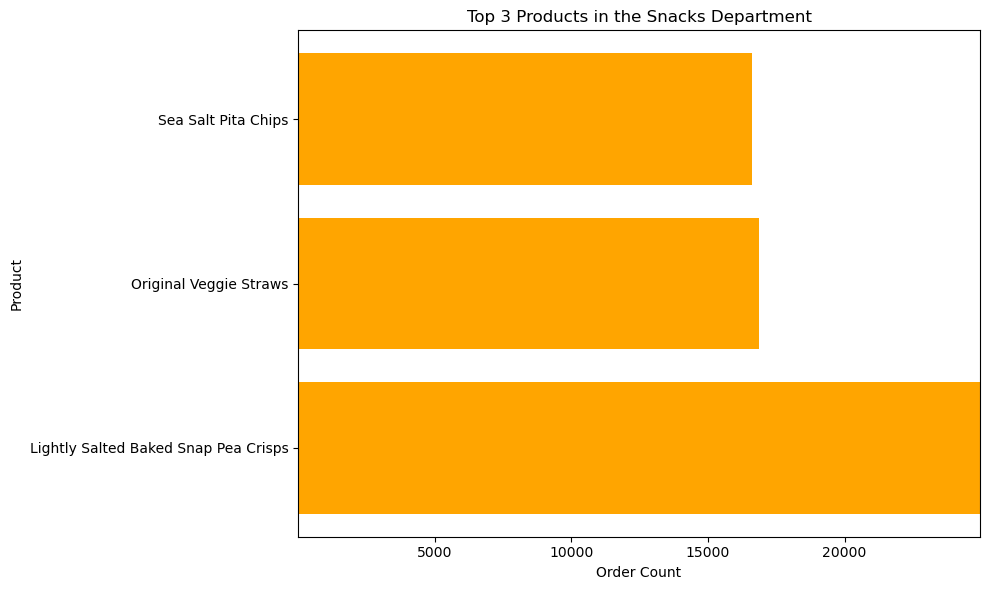

In [34]:
# Filter the DataFrame for the snacks department
snacks_products = df_active_dep[df_active_dep['department'] == 'snacks']

# Compute the order counts for each product
order_counts = snacks_products['product_name'].value_counts().reset_index()
order_counts.columns = ['product_name', 'order_count']

# Find the top 3 products in the dairy eggs department based on order count
top_snacks_products = order_counts.nlargest(3, 'order_count')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(top_snacks_products['product_name'], top_snacks_products['order_count'], color='orange')
plt.xlabel('Order Count')
plt.ylabel('Product')
plt.title('Top 3 Products in the Snacks Department')
plt.xlim(1, top_snacks_products['order_count'].max() + 1)  # Add some padding to the max count

# Ensure the layout is tight so labels are not cut off
plt.tight_layout()

plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'Top_3_snacks.png'), bbox_inches = 'tight')

# Show the plot
plt.show()


What is the distribution among users in regards to their brand loyalty?

In [36]:
#show the value counts of the loyalty_flag
loyalty_chart = ords_prods_cust['loyalty_flag'].value_counts()

In [37]:
loyalty_chart

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

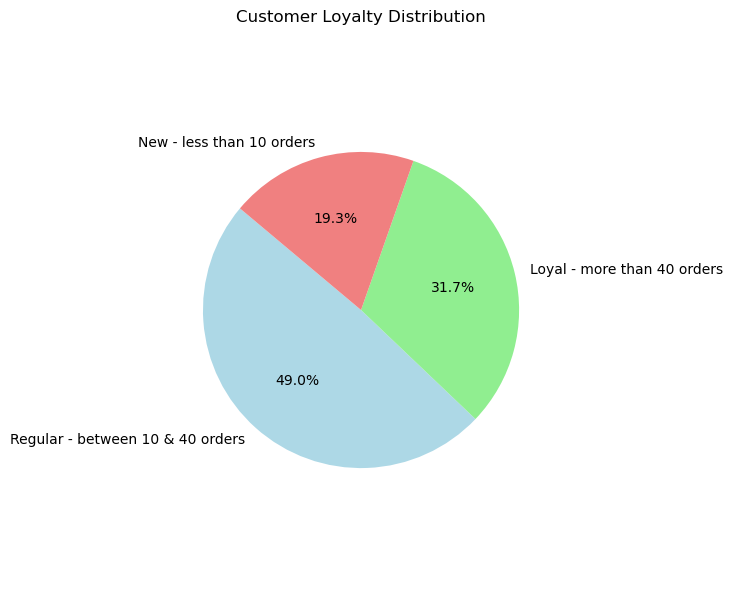

In [38]:
#Create a pie chart to show the loyalty distribution

loyalty_data = {
    'Regular - between 10 & 40 orders': 15876776,
    'Loyal - more than 40 orders': 10284093,
    'New - less than 10 orders': 6243990
}

# Extract labels and sizes
labels = list(loyalty_data.keys())
sizes = list(loyalty_data.values())

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])

# Add a title
plt.title('Customer Loyalty Distribution')

# Ensure the pie chart is a circle
plt.axis('equal')

# Adjust layout to ensure nothing is cut off
plt.tight_layout()

# Adjust the layout manually
plt.subplots_adjust(left=0.2, right=0.7, top=0.9, bottom=0.1)

# Save the chart
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'piechart_loyalty_distribution.png'))

# Display the plot
plt.show()

Are there differences in ordering habits based on a customer's loyalty status?

In [40]:
loyalty_agg = ords_prods_cust.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean']})

In [94]:
loyalty_agg

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.120024
New customer,16.776507
Regular customer,12.103039


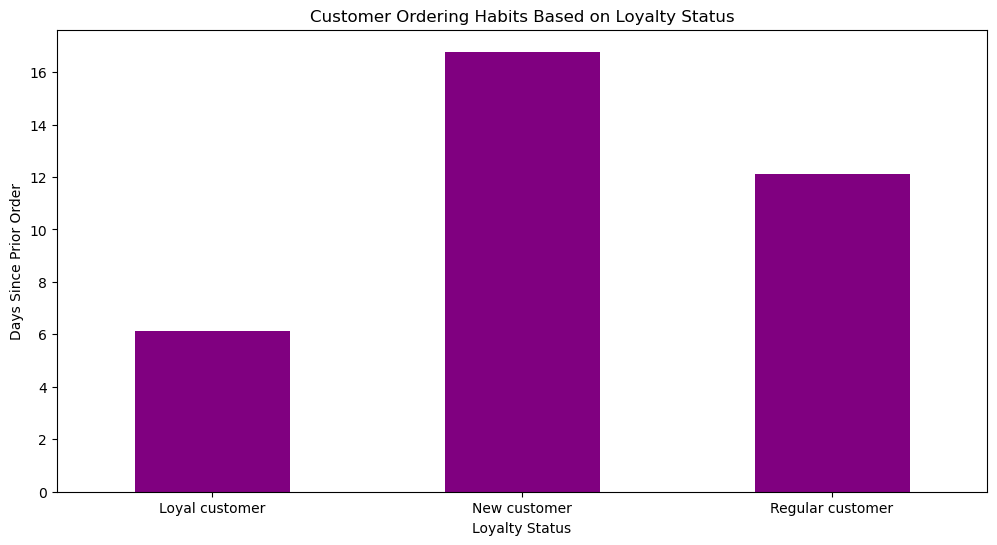

In [95]:
# Create chart of ordering habits based on a customer's loyalty status
ax = loyalty_agg.plot.bar(figsize=(12, 6), color='purple')
ax.set_xlabel('Loyalty Status')
ax.set_ylabel('Days Since Prior Order')
ax.set_title('Customer Ordering Habits Based on Loyalty Status')

# Set x-axis labels horizontally
ax.tick_params(axis='x', rotation=0)

# Disable the legend
ax.legend().set_visible(False)

# Save the chart
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'bar_loyalty_prior_order.png'))
plt.savefig(path2, bbox_inches='tight')


Are there differences between ordering habits based on a customer's region?

In [97]:
#create crosstab for region and department
crosstab_region_department = pd.crosstab(df_active_dep['Region'], df_active_dep['department'], dropna = False)

In [98]:
crosstab_region_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,...,188287,69484,182426,17043,9074,481387,112658,25491,2424964,741814


In [99]:
crosstab_region_department.T

Region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


In [100]:
crosstab_region_department.to_clipboard()

In [101]:
#create crosstab for region and age group
crosstab_age_region = pd.crosstab(df_active_dep['Region'], df_active_dep['Age_flag'], dropna = False)

In [102]:
crosstab_age_region

Age_flag,Adult,Senior,Young Adult
Region,,,
Midwest,3608769,3049022,939534
Northeast,2671969,2339655,711112
South,5071002,4344218,1376665
West,3915770,3359265,1017878


In [103]:
crosstab_age_region.to_clipboard()

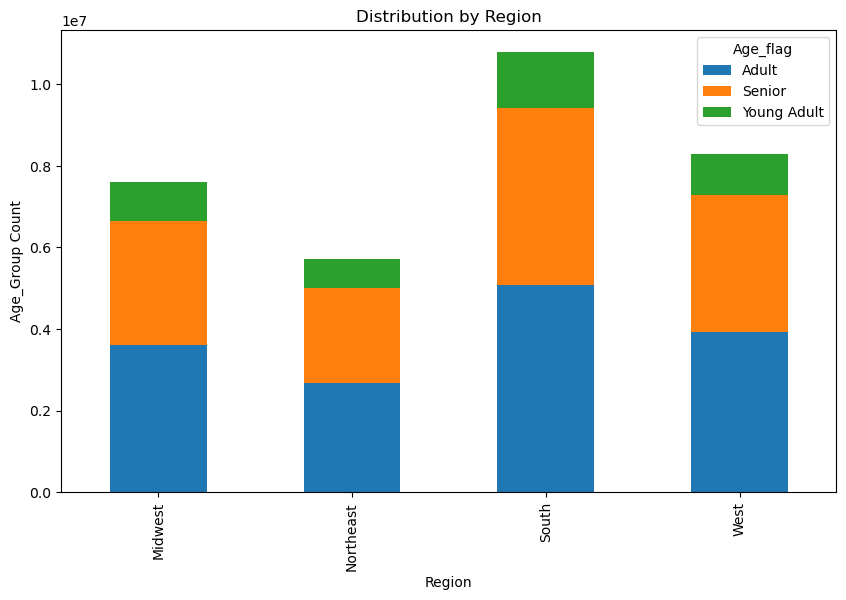

In [104]:
crosstab_age_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Age_Group Count')

# Save the plot to a file with tight bounding box to ensure everything is included
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'bar_age_region.png'))
plt.savefig(path2, bbox_inches='tight')

# Display the plot
plt.show()


In [105]:
#create a crosstab for region and income group
crosstab_income_region = pd.crosstab(df_active_dep['Region'], df_active_dep['income_flag'], dropna = False)

In [106]:
crosstab_income_region

income_flag,High Income,Low Income,Medium High Income,Medium Income,Medium Low Income
Region,,,,,
Midwest,955414,838398,1486246,1629501,2687766
Northeast,706738,627256,1089191,1272112,2027439
South,1342055,1219460,2029480,2433067,3767823
West,1046633,908969,1578892,1812647,2945772


In [107]:
crosstab_income_region.to_clipboard()

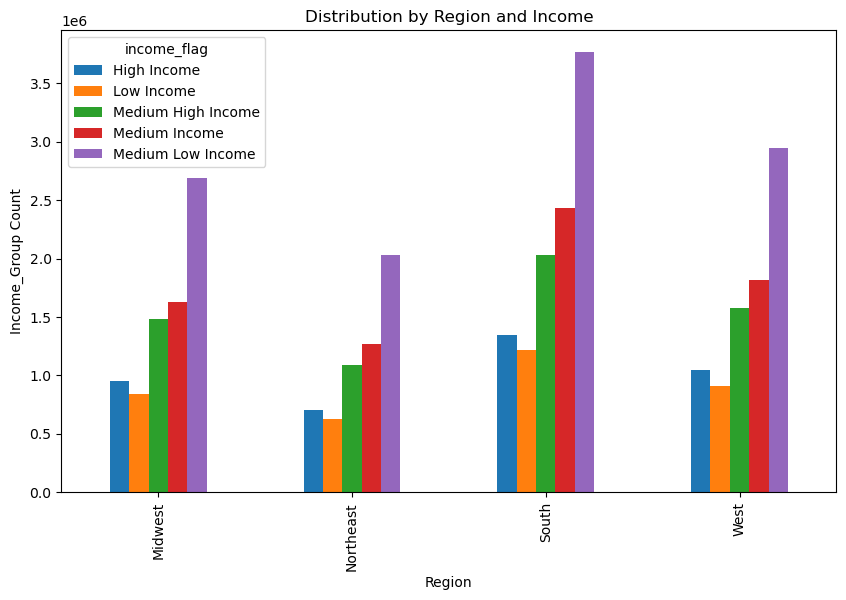

In [108]:
crosstab_income_region.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution by Region and Income')
plt.xlabel('Region')
plt.ylabel('Income_Group Count')

# Save the plot to a file with tight bounding box to ensure everything is included
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'bar_income_region.png'))
plt.savefig(path2, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
#export to Large Files
df_active_dep.to_pickle(os.path.join(path, 'orders_products_all.pkl'))